In [37]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.models import Sequential

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
fashion_mnist=keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 11s 3us/step


In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:
x_train.shape

(60000, 28, 28)

In [10]:
len(x_train)

60000

In [15]:
len(y_train)

60000

In [16]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [17]:
y_test.shape

(10000,)

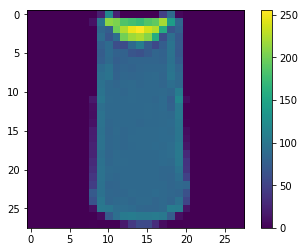

In [28]:
plt.figure()
plt.imshow(x_train[2])
plt.colorbar()
plt.grid(False)

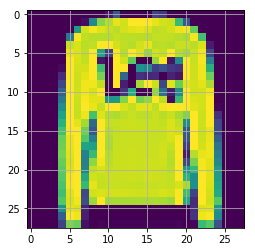

In [30]:
plt.figure()
plt.imshow(x_test[1])
plt.colormaps()
plt.grid()

In [32]:
x_train=x_train/255.0
x_test=x_test/255.0

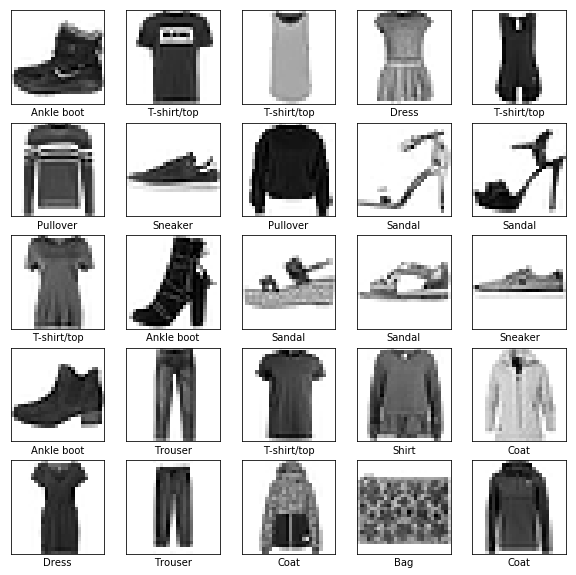

In [34]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

In [36]:
model=Sequential()


In [42]:
#model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [44]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [46]:
model.fit(x_train, y_train ,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 127us/step - loss: 0.5525 - acc: 0.8005
Epoch 2/5
60000/60000 [==============================] - 7s 122us/step - loss: 0.4935 - acc: 0.8227
Epoch 3/5
60000/60000 [==============================] - 8s 127us/step - loss: 0.4521 - acc: 0.8377
Epoch 4/5
60000/60000 [==============================] - 7s 122us/step - loss: 0.4257 - acc: 0.8458
Epoch 5/5
60000/60000 [==============================] - 8s 137us/step - loss: 0.4068 - acc: 0.8530


In [48]:
test_loss, test_accu=model.evaluate(x_test, y_test)
print('Test accutacy:', test_accu)

10000/10000 [==============================] - 1s 51us/step
Test accutacy: 0.8334


In [49]:
print(test_loss)

0.46102607960700986


In [50]:
prediction=model.predict(x_test)

In [51]:
prediction[1]

array([1.2410791e-03, 2.0556836e-05, 8.6163664e-01, 4.3192387e-05,
       5.0973776e-03, 2.3709946e-07, 1.3169305e-01, 5.1591878e-20,
       2.6790198e-04, 2.1181420e-13], dtype=float32)

In [52]:
prediction[0]

array([8.0768643e-07, 1.0305433e-08, 7.7702896e-07, 2.0264899e-06,
       3.4656824e-07, 5.0283965e-02, 1.5296479e-05, 8.0572091e-02,
       1.7899818e-03, 8.6733472e-01], dtype=float32)

In [53]:
np.argmax(prediction[0])

9

In [55]:
y_test[0]

9

In [68]:
def plot_image(i, prediction_array, true_label, img):
    prediction_array, true_label, img=prediction_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label=np.argmax(prediction_array)
    if predicted_label==true_label:
        coor='blue'
    else:
        color='red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(prediction_array),
                                class_names[true_label]),
                                color=color)
    

def plot_value_array(i, prediction_array, true_label):
    prediction_array, true_label = prediction_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), prediction_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(prediction_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

UnboundLocalError: local variable 'color' referenced before assignment

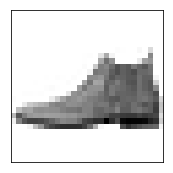

In [69]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, prediction,  y_test)